In [151]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
import platform, warnings, os

# ── 1) OS별 기본 한글 폰트 후보 ----------------------------------------------
if platform.system() == "Darwin":        # macOS
    font_name = "AppleGothic"
elif platform.system() == "Windows":     # Windows
    font_name = "Malgun Gothic"
else:                                    # Linux: 나눔폰트(설치돼 있어야 함)
    font_name = "NanumGothic"

# ── 2) 폰트 존재 여부 확인 후 세팅 --------------------------------------------
if font_name not in [f.name for f in font_manager.fontManager.ttflist]:
    warnings.warn(f"⚠ '{font_name}' 폰트를 찾을 수 없습니다. 다른 한글 폰트로 교체하세요!")

rcParams["font.family"] = font_name
rcParams["axes.unicode_minus"] = False   # 마이너스 기호 깨짐 방지

print(f"✓ matplotlib 한글 폰트 설정: {font_name}")


✓ matplotlib 한글 폰트 설정: AppleGothic


In [152]:
# ── 루트 자동 고정 ───────────────────────────────────────────────────
from pathlib import Path, os, sys
p = Path.cwd()
while p != p.parent and not (p / "data" / "raw").exists():
    p = p.parent
os.chdir(p)
print("✅ 루트:", p)

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm   # 폰트 관리 모듈

# ▼ 시스템에 따라 사용 가능한 한글 폰트 이름을 지정하세요
#   • macOS   : "AppleGothic"
#   • Windows : "Malgun Gothic"
#   • Ubuntu  : "NanumGothic"
plt.rcParams['font.family'] = 'AppleGothic'     # ← 예: mac 기준
plt.rcParams['axes.unicode_minus'] = False      # ➊ 음수 부호(−) 깨짐 방지


✅ 루트: /Users/bichae/active-zones-report


In [153]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

try:
    df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv", encoding="utf-8-sig")
    print("▲ with_flags 파일 로드")
except FileNotFoundError:
    df = pd.read_csv("data/processed/merged_annual_2024.csv", encoding="utf-8-sig")
    print("▲ 기본 연간 CSV 로드 → 플래그 즉석 계산")
    metrics = ["resident_pop_2024","floating_pop_2024","estimated_sales_2024"]
    q75 = {m: df[m].quantile(0.75) for m in metrics}
    q90 = {m: df[m].quantile(0.90) for m in metrics}
    med = {m: df[m].median()          for m in metrics}
    for m in metrics:
        df[f"{m}_high25"] = df[m] >= q75[m]
        df[f"{m}_high10"] = df[m] >= q90[m]
        df[f"{m}_high50"] = df[m] >= med[m]
    df["is_active_25"] = df[[f"{m}_high25" for m in metrics]].sum(axis=1) >= 2
    df["is_active_10"] = df[[f"{m}_high10" for m in metrics]].sum(axis=1) >= 2
    df["is_active_50"] = df[[f"{m}_high50" for m in metrics]].all(axis=1)

print(f"총 상권 {len(df)}개 | 75% 활발 {df.is_active_25.sum()}개 | "
      f"90% 활발 {df.is_active_10.sum()}개 | Median 기준 {df.is_active_50.sum()}개")


▲ with_flags 파일 로드


AttributeError: 'DataFrame' object has no attribute 'is_active_50'

In [ ]:
counts = {
    "75% 기준\n(2지표↑)": df.is_active_25.sum(),
    "90% 기준\n(2지표↑)": df.is_active_10.sum(),
    "Median 기준\n(3지표 모두)": df.is_active_50.sum(),
}
plt.figure(figsize=(6,4))
bars = plt.bar(counts.keys(), counts.values(), edgecolor="k", color="#5DADE2")
for b in bars:
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+5, f"{int(b.get_height())}", ha="center")
plt.title("퍼센타일 기준별 활발 상권 수")
plt.ylabel("상권 수")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()
# 저장(선택)
# os.makedirs("reports/figures", exist_ok=True)
# plt.savefig("reports/figures/active_zones_bar.png", dpi=200)


AttributeError: 'DataFrame' object has no attribute 'is_active_50'

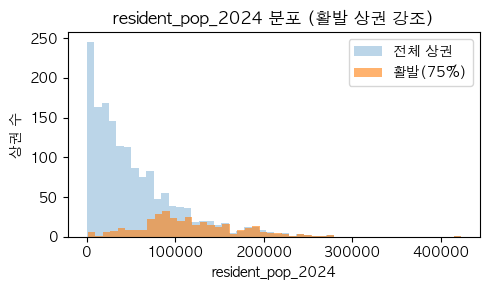

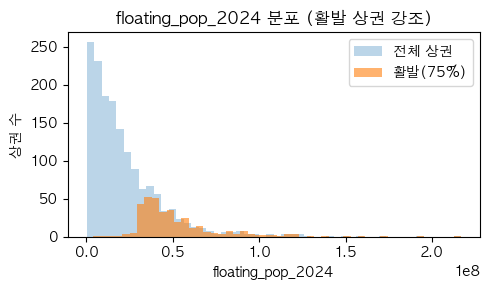

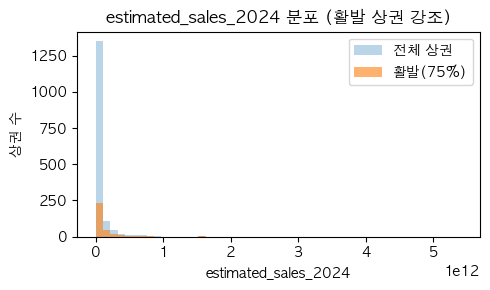

In [154]:
metrics = ["resident_pop_2024","floating_pop_2024","estimated_sales_2024"]
for m in metrics:
    plt.figure(figsize=(5,3))
    plt.hist(df[m], bins=50, alpha=0.3, label="전체 상권")
    plt.hist(df.loc[df.is_active_25, m], bins=50, alpha=0.6, label="활발(75%)")
    plt.title(f"{m} 분포 (활발 상권 강조)")
    plt.xlabel(m); plt.ylabel("상권 수")
    plt.legend(); plt.tight_layout(); plt.show()


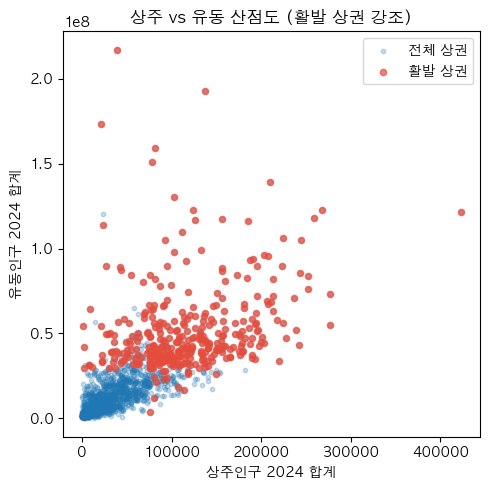

In [155]:
plt.figure(figsize=(5,5))
plt.scatter(df.resident_pop_2024, df.floating_pop_2024,
            s=10, alpha=0.25, label="전체 상권")
plt.scatter(df.loc[df.is_active_25, "resident_pop_2024"],
            df.loc[df.is_active_25, "floating_pop_2024"],
            s=20, alpha=0.7, label="활발 상권", color="#E74C3C")
plt.xlabel("상주인구 2024 합계"); plt.ylabel("유동인구 2024 합계")
plt.title("상주 vs 유동 산점도 (활발 상권 강조)")
plt.legend(); plt.tight_layout(); plt.show()


✓ matplotlib 한글 폰트 설정: AppleGothic


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/3775888215.py:27: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  plt.tight_layout(); plt.show()
/opt/homebrew/Caskroom/miniconda/base/envs/gopchang-locator/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


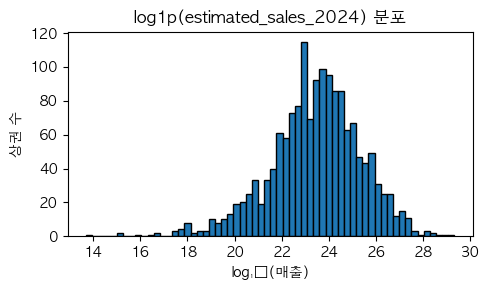

In [156]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
import platform, warnings, os

# ── 1) OS별 기본 한글 폰트 후보 ----------------------------------------------
if platform.system() == "Darwin":        # macOS
    font_name = "AppleGothic"
elif platform.system() == "Windows":     # Windows
    font_name = "Malgun Gothic"
else:                                    # Linux: 나눔폰트(설치돼 있어야 함)
    font_name = "NanumGothic"

# ── 2) 폰트 존재 여부 확인 후 세팅 --------------------------------------------
if font_name not in [f.name for f in font_manager.fontManager.ttflist]:
    warnings.warn(f"⚠ '{font_name}' 폰트를 찾을 수 없습니다. 다른 한글 폰트로 교체하세요!")

rcParams["font.family"] = font_name
rcParams["axes.unicode_minus"] = False   # 마이너스 기호 깨짐 방지

print(f"✓ matplotlib 한글 폰트 설정: {font_name}")


plt.figure(figsize=(5,3))
plt.hist(np.log1p(df["estimated_sales_2024"]), bins=60, edgecolor="k")
plt.title("log1p(estimated_sales_2024) 분포")
plt.xlabel("log₁₀(매출)"); plt.ylabel("상권 수")
plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd, numpy as np

# ── 1) 연간 집계 + 플래그 CSV 로드 ─────────────────────────
df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv",
                encoding="utf-8-sig")

# ── 2) 골목·발달·관광특구 … 상권구분 붙이기 ─────────────────
cat = (pd.read_csv("data/raw/서울시 상권분석서비스(길단위인구-상권).csv",
                encoding="cp949",
                usecols=["상권_코드", "상권_구분_코드_명"])
         .drop_duplicates())
df = df.merge(cat, on="상권_코드", how="left")

# ── 3) score(세 지표 Z-점수 평균) 계산 ───────────────────────
metrics = ["resident_pop_2024",
        "floating_pop_2024",
        "estimated_sales_2024"]

for m in metrics:
    df[f"z_{m}"] = (df[m] - df[m].mean()) / df[m].std()

df["score"] = df[[f"z_{m}" for m in metrics]].mean(axis=1)

# ── 4) 상권 유형별 평균·표본 수 ──────────────────────────────
type_mean = (df.groupby("상권_구분_코드_명")["score"]
            .agg(mean="mean", count="count")
            .sort_values("mean", ascending=False))
display(type_mean)


,mean,count
상권_구분_코드_명,,
관광특구,2.866918,6
발달상권,0.457171,245
골목상권,-0.002439,1041
전통시장,-0.454013,279


In [ ]:
# ───────────────────────────────────────────────────────────────────
# 1) CSV 헤더에서 자치구·행정동 컬럼 이름을 자동으로 찾아주는 함수
# ───────────────────────────────────────────────────────────────────
import re

def guess_col(patterns, columns):
    """
    columns 리스트에서 정규식 리스트(patterns)와 매칭되는
    첫 번째 컬럼명을 반환. 없으면 None.
    """
    for pat in patterns:                # 1단계: 패턴 루프
        for col in columns:             # 2단계: 컬럼 루프
            if re.search(pat, col, re.I):
                return col
    return None

In [ ]:
import geopandas as gpd, glob, pprint
shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf_head = gpd.read_file(shp, encoding="utf-8", nrows=0)  # 헤더만
pprint.pprint(list(gdf_head.columns))


['TRDAR_SE_C',
 'TRDAR_SE_1',
 'TRDAR_CD',
 'TRDAR_CD_N',
 'XCNTS_VALU',
 'YDNTS_VALU',
 'SIGNGU_CD',
 'SIGNGU_CD_',
 'ADSTRD_CD',
 'ADSTRD_CD_',
 'RELM_AR',
 'geometry']


In [ ]:
# df 안에 '시군구' 글자가 들어간 모든 컬럼
print([c for c in df.columns if "시군구" in c or "SIGNGU" in c])

# df 안에 '행정동' 글자가 들어간 모든 컬럼
print([c for c in df.columns if "행정동" in c or "ADSTRD" in c])


['시군구명_x', '시군구명_y']
['행정동명_x', '행정동명_y']


In [ ]:
# ── 1) 두 열을 하나로 통합 (coalesce) ────────────────────────
df["시군구명"]  = df["시군구명_x"].fillna(df["시군구명_y"])
df["행정동명"]  = df["행정동명_x"].fillna(df["행정동명_y"])

# ── 2) 불필요한 _x / _y 열 제거 ────────────────────────────
df = df.drop(columns=["시군구명_x", "시군구명_y",
                      "행정동명_x", "행정동명_y"])

# ── 3) 확인 ────────────────────────────────────────────────
print(df.loc[df["상권_코드"].isin([3001492, 3120189, 3110661, 3120131]),
             ["상권_코드", "상권_코드_명", "시군구명", "행정동명"]])


        상권_코드                 상권_코드_명 시군구명  행정동명
1     3001492  명동 남대문 북창동 다동 무교동 관광특구   중구   소공동
638   3110661               강서새말어린이공원  강서구  화곡6동
1175  3120131                 가산디지털단지  금천구   가산동
1232  3120189                     강남역  서초구  서초2동


In [ ]:
# 1) 머지 접미사 정리  ───────────────────────────────────────────
df["상권_구분_코드_명"] = df.filter(like="상권_구분_코드_명").bfill(axis=1).iloc[:,0]
df = df.drop(columns=[c for c in df.columns if c.startswith("상권_구분_코드_명_")])

# 2) 자치구·유형별 활발 상권 수 집계  ─────────────────────────────
summary = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
             .sum()
             .rename("활발_상권_수")
             .reset_index()
             .sort_values(["상권_구분_코드_명","활발_상권_수"], ascending=[True,False]))

print(summary.head(15))     # 상위 일부 미리보기


   상권_구분_코드_명  시군구명  활발_상권_수
24       골목상권   중랑구       18
1        골목상권   강동구       17
4        골목상권   관악구       17
3        골목상권   강서구       16
5        골목상권   광진구       16
21       골목상권   은평구       13
17       골목상권   송파구       12
10       골목상권  동대문구       11
2        골목상권   강북구       10
6        골목상권   구로구        9
16       골목상권   성북구        9
11       골목상권   동작구        8
18       골목상권   양천구        8
19       골목상권  영등포구        8
20       골목상권   용산구        8


In [158]:


# 필요 라이브러리
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# ── ① 집계 데이터 준비 ──────────────────────────────────────────
# df 는 이미 '상권_구분_코드_명','시군구명','is_active_25' 컬럼이 포함돼 있어야 합니다.
summary = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
             .sum().reset_index(name="활발_상권_수"))

# 골목상권만 가져와 상위 15개 자치구 선택
g_summary = (summary.query("상권_구분_코드_명 == '골목상권'")
                      .nlargest(15, "활발_상권_수"))

# ── ② 막대차트 그리기 ─────────────────────────────────────────
plt.figure(figsize=(8, 6))
sns.barplot(x="활발_상권_수", y="시군구명",
            data=g_summary, palette="viridis")

plt.title("자치구별 활발 골목상권 수 (Top 15)", fontsize=14)
plt.xlabel("활발 골목상권 수(개)")
plt.ylabel("자치구")
plt.tight_layout()
plt.show()


KeyError: '상권_구분_코드_명'

In [ ]:
# ── ① 교차표(피벗) 계산 ───────────────────────────────────────
pivot = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
           .sum()                    # 자치구·유형별 활발 상권 수
           .unstack(fill_value=0)    # 행=상권유형, 열=시군구
           .sort_index())            # 유형 알파벳순 정렬

# ── ② 결과 미리보기 & 저장 ────────────────────────────────────
display(pivot.iloc[:, :15])          # 열이 많으면 일부만 보기
pivot.to_excel("reports/active_zones_cross_tab.xlsx")
print("✔ 교차표 저장: reports/active_zones_cross_tab.xlsx")


시군구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구
상권_구분_코드_명,,,,,,,,,,,,,,,
골목상권,3,17,10,16,17,16,9,3,6,7,11,8,7,6,3
관광특구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
발달상권,21,4,3,3,2,6,4,2,1,0,3,3,5,3,13
전통시장,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
import glob, pprint
pprint.pprint(glob.glob("data/raw/*.csv"))


['data/raw/서울시 상권분석서비스(추정매출-상권).csv',
 'data/raw/서울시 상권분석서비스(길단위인구-상권).csv',
 'data/raw/서울시 상권분석서비스(상주인구-상권).csv']


In [ ]:
agg = pd.read_csv("data/processed/merged_annual_2024.csv",
                  encoding="utf-8-sig")
# → Step 2 (퍼센타일) · Step 3 (Z-score)부터 실행


In [ ]:
agg = pd.read_csv("data/processed/merged_annual_2024.csv", encoding="utf-8-sig")
# 이후 Step 2, 3 그대로 실행


In [ ]:
# ▣ STEP 2 ─ 퍼센타일(75/90) & 플래그 -----------------------------------------
metrics = ["resident_pop_2024", "floating_pop_2024", "estimated_sales_2024"]
q75 = {m: agg[m].quantile(0.75) for m in metrics}
q90 = {m: agg[m].quantile(0.90) for m in metrics}

for m in metrics:
    agg[f"{m}_high25"] = agg[m] >= q75[m]
    agg[f"{m}_high10"] = agg[m] >= q90[m]

agg["is_active_25"] = agg[[f"{m}_high25" for m in metrics]].sum(axis=1) >= 2
agg["is_active_10"] = agg[[f"{m}_high10" for m in metrics]].sum(axis=1) >= 2

print(f"🥇 활발(75%)  {agg['is_active_25'].sum()}곳")
print(f"🏆 극히 활발(90%) {agg['is_active_10'].sum()}곳")

# ▣ STEP 3 ─ 로그 변환 + Z-score 통합 ----------------------------------------
for m in metrics:
    agg[f"log_{m}"] = np.log1p(agg[m])                # log(1+x)
    agg[f"z_{m}"]   = (agg[f"log_{m}"] - agg[f"log_{m}"].mean()) / agg[f"log_{m}"].std()

agg["score"] = agg[[f"z_{m}" for m in metrics]].mean(axis=1)

agg.to_csv(f"{PROC_DIR}/merged_annual_2024_with_flags.csv",
           index=False, encoding="utf-8-sig")
print("✅ 로그·Z-score 완료 → 저장:", agg.shape)

🥇 활발(75%)  353곳
🏆 극히 활발(90%) 124곳
✅ 로그·Z-score 완료 → 저장: (1571, 19)


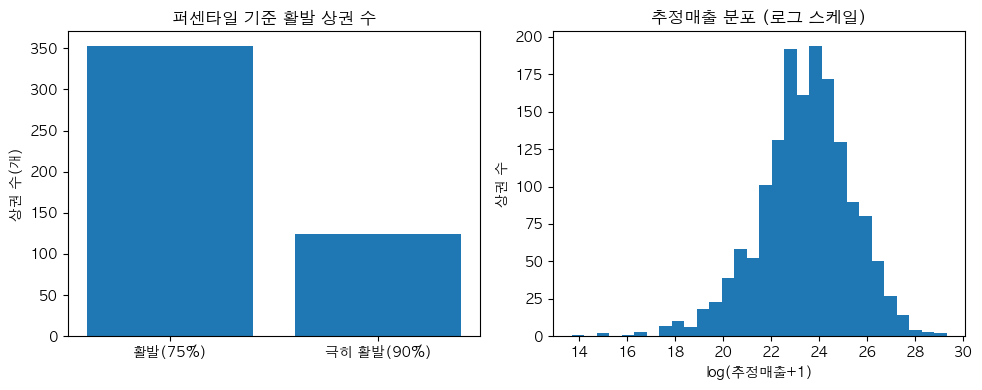

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# ── 0) 활발·극히 활발 플래그가 붙은 연-간 DF 로드 ───────────────
agg = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv",
                  encoding="utf-8-sig")

# ── 1) 막대차트용 카운트 ─────────────────────────────────────
n_active  = agg["is_active_25"].sum()   # 353
n_ultra   = agg["is_active_10"].sum()   # 124

# ── 2) 히스토그램용 지표(예: 추정매출) 로그 변환 ───────────────
log_sales = np.log1p(agg["estimated_sales_2024"])   # log(1+x)

# ── 3) 플롯 -------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# ① 막대차트
ax[0].bar(["활발(75%)", "극히 활발(90%)"], [n_active, n_ultra])
ax[0].set_ylabel("상권 수(개)")
ax[0].set_title("퍼센타일 기준 활발 상권 수")

# ② 로그-히스토그램
ax[1].hist(log_sales, bins=30)
ax[1].set_xlabel("log(추정매출+1)")
ax[1].set_ylabel("상권 수")
ax[1].set_title("추정매출 분포 (로그 스케일)")

plt.tight_layout()
plt.show()


In [ ]:
meta = (gdf[["상권_코드","상권_코드_명",
             "시군구명","행정동명","lat","lon"]]
        .copy())                       # ← 여기서 명시적 복사

meta["상권_코드"] = meta["상권_코드"].astype(int)


In [ ]:
required = ["상권_코드_명", "시군구명", "행정동명", "lat", "lon"]
print([c for c in required if c not in df.columns])   # → 빈 리스트([])면 OK


['상권_코드_명', '시군구명', '행정동명']


In [ ]:
import pandas as pd, geopandas as gpd, glob

# ── 1) SHP에서 코드·이름·자치구·행정동만 추출 ───────────────────
shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf = gpd.read_file(shp, encoding="utf-8").rename(columns={
    "TRDAR_CD"  : "상권_코드",
    "TRDAR_CD_N": "상권_코드_명",
    "SIGNGU_CD_": "시군구명",
    "ADSTRD_CD_": "행정동명"
})
meta_name = gdf[["상권_코드","상권_코드_명","시군구명","행정동명"]].copy()
meta_name["상권_코드"] = meta_name["상권_코드"].astype(int)

# ── 2) 연간 DF 로드 & dtype 맞춘 뒤 병합 ─────────────────────────
df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv",
                 encoding="utf-8-sig")
df["상권_코드"] = df["상권_코드"].astype(int)

df = df.merge(meta_name, on="상권_코드", how="left")

# ── 3) _x/_y 정리 (혹시 남아 있으면) ───────────────────────────
for base in ["상권_코드_명","시군구명","행정동명"]:
    cand = [c for c in df.columns if c.startswith(base+"_")]
    if cand and base not in df:
        df[base] = df[cand[0]]
    df.drop(columns=cand, inplace=True, errors="ignore")

# ── 4) 확인 ────────────────────────────────────────────────────
print(df.loc[df["상권_코드"].isin([3001492,3120189,3110661,3120131]),
             ["상권_코드","상권_코드_명","시군구명","행정동명"]].head())


        상권_코드                 상권_코드_명 시군구명  행정동명
1     3001492  명동 남대문 북창동 다동 무교동 관광특구   중구   소공동
638   3110661               강서새말어린이공원  강서구  화곡6동
1175  3120131                 가산디지털단지  금천구   가산동
1232  3120189                     강남역  서초구  서초2동


In [ ]:
import pandas as pd, geopandas as gpd, glob, numpy as np

# 0) 연-간 DF 로드 ──────────────────────────────────────────────
df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv",
                 encoding="utf-8-sig")

# 1) lat/lon 없으면 SHP → 중심점 좌표 추출 후 병합 ─────────────
if {"lat", "lon"}.issubset(df.columns) is False:
    shp = glob.glob("data/raw/상권경계/*.shp")[0]
    gdf = gpd.read_file(shp, encoding="utf-8")

    # 중심점 WGS84 계산
    cent = gdf.to_crs(5179).geometry.centroid.to_crs(4326)
    gdf = gdf.assign(lon=cent.x, lat=cent.y)

    coord = (gdf[["TRDAR_CD", "lon", "lat"]]
             .rename(columns={"TRDAR_CD": "상권_코드"})
             .astype({"상권_코드": int}))
    df = df.merge(coord, on="상권_코드", how="left")
    print("✓ 좌표 재병합 완료")

# 2) _x / _y 접미사 정리 ───────────────────────────────────────
for base in ["lat", "lon"]:
    cand = [c for c in df.columns if c.startswith(base+"_")]
    if cand and base not in df.columns:
        df[base] = df[cand[0]]
    df.drop(columns=cand, inplace=True, errors="ignore")

missing = [c for c in ["lat", "lon"] if c not in df.columns]
if missing:
    raise KeyError(f"❌ 아직 {missing} 컬럼이 없습니다. SHP 경로·컬럼명을 다시 확인하세요.")

print("✔ lat / lon 준비 끝 :", df[["lat","lon"]].notna().sum().tolist(), "개 좌표")

# 3) 여기서 Folium 코드 바로 이어서 실행 가능


✓ 좌표 재병합 완료
✔ lat / lon 준비 끝 : [1571, 1571] 개 좌표


In [ ]:
import geopandas as gpd, glob, pandas as pd

# 1. SHP 읽어 상권 코드·이름 추출
shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf = gpd.read_file(shp, encoding="utf-8")

#   ▶ 실제 컬럼명 확인
print([c for c in gdf.columns if "TRDAR" in c])
# 예) ['TRDAR_CD', 'TRDAR_CD_N']

name_map = (gdf[["TRDAR_CD", "TRDAR_CD_N"]]
            .rename(columns={"TRDAR_CD":"상권_코드",
                             "TRDAR_CD_N":"상권_코드_명"})
            .astype({"상권_코드": int})
            .drop_duplicates("상권_코드"))

# 2. 연간 DF 에 이름만 병합
df = df.merge(name_map, on="상권_코드", how="left")

# 3. 확인
print(df.loc[df["상권_코드"].isin([3001492,3120189,3110661,3120131]),
             ["상권_코드","상권_코드_명"]])


['TRDAR_SE_C', 'TRDAR_SE_1', 'TRDAR_CD', 'TRDAR_CD_N']
        상권_코드                 상권_코드_명
1     3001492  명동 남대문 북창동 다동 무교동 관광특구
638   3110661               강서새말어린이공원
1175  3120131                 가산디지털단지
1232  3120189                     강남역


In [ ]:
gdf = gpd.read_file(shp, encoding="utf-8")

cent = gdf.to_crs(5179).geometry.centroid.to_crs(4326)
gdf = gdf.assign(lon=cent.x, lat=cent.y)

meta_full = (gdf.rename(columns={
                    "TRDAR_CD"  : "상권_코드",
                    "TRDAR_CD_N": "상권_코드_명",
                    "SIGNGU_CD_": "시군구명",
                    "ADSTRD_CD_": "행정동명"})
               [["상권_코드","상권_코드_명","시군구명","행정동명","lat","lon"]]
               .astype({"상권_코드": int}))

df = df.merge(meta_full, on="상권_코드", how="left")


In [ ]:
import pandas as pd, geopandas as gpd, glob, os, folium, numpy as np

# ───────────────────────────────────────────────────────────────
# ① 좌표·상권명 병합 → 새 CSV 저장
# ───────────────────────────────────────────────────────────────
df = pd.read_csv(
    "data/processed/merged_annual_2024_with_flags.csv",
    encoding="utf-8-sig"
).astype({"상권_코드": int})

# (1) SHP 로드해서 메타 만들기
shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf = gpd.read_file(shp, encoding="utf-8")           # 컬럼: TRDAR_CD / TRDAR_CD_N …

cent = gdf.to_crs(5179).geometry.centroid.to_crs(4326)
gdf = gdf.assign(lon=cent.x, lat=cent.y)

meta = (
    gdf.rename(columns={
        "TRDAR_CD"  : "상권_코드",
        "TRDAR_CD_N": "상권_코드_명",
        "SIGNGU_CD_" : "시군구명",
        "ADSTRD_CD_" : "행정동명"
    })
    [["상권_코드", "상권_코드_명", "시군구명", "행정동명", "lat", "lon"]]
    .astype({"상권_코드": int})
    .drop_duplicates("상권_코드")
)

# (2) 병합
df_full = df.merge(meta, on="상권_코드", how="left")

# (3) 새 파일로 저장해 두기
full_path = "data/processed/merged_annual_2024_full.csv"
os.makedirs(os.path.dirname(full_path), exist_ok=True)
df_full.to_csv(full_path, index=False, encoding="utf-8-sig")
print("✓ 좌표·이름까지 포함한 파일 저장:", full_path)

# ───────────────────────────────────────────────────────────────
# ② Folium 지도 (네 후보 상권) 생성
# ───────────────────────────────────────────────────────────────
codes = [3001492, 3120189, 3110661, 3120131]   # 명동·강남역·구디·가디
cand  = df_full[df_full["상권_코드"].isin(codes)].copy()

m = folium.Map(location=[37.5665, 126.9780], zoom_start=11,
               tiles="CartoDB positron")
colors = ["red", "blue", "green", "purple"]

for _, r in cand.iterrows():
    popup = (f"<b>{r['상권_코드_명']}</b><br>"
             f"{r['시군구명']} {r['행정동명']}<br>"
             f"상주 {r['resident_pop_2024']:,}명<br>"
             f"유동 {r['floating_pop_2024']:,}명<br>"
             f"매출 {r['estimated_sales_2024']:,}원")
    folium.CircleMarker(
        [r["lat"], r["lon"]], radius=10,
        color=colors.pop(0), fill=True, fill_opacity=0.9,
        popup=folium.Popup(popup, max_width=250)
    ).add_to(m)

out = "reports/figures/active_zones_map.html"
os.makedirs(os.path.dirname(out), exist_ok=True)
m.save(out)
print("✅ Folium 지도 생성 완료:", out)


✓ 좌표·이름까지 포함한 파일 저장: data/processed/merged_annual_2024_full.csv
✅ Folium 지도 생성 완료: reports/figures/active_zones_map.html


In [ ]:
# ── 2. 이름·좌표 메타 준비 ──────────────────────────────────────────────
shp = glob.glob(str(RAW_DIR / "상권경계/*.shp"))[0]
meta = gpd.read_file(shp, encoding="utf-8").rename(columns={
        "TRDAR_CD"   : "상권_코드",
        "TRDAR_CD_N" : "상권_코드_명",
        "SIGNGU_CD_NM": "시군구명",      # 없을 수도 있음
        "ADSTRD_CD_NM": "행정동명"       # 없을 수도 있음
})

# ── (★) 누락 컬럼 보강 ────────────────────────────────────────────────
for col in ["시군구명", "행정동명"]:
    if col not in meta.columns:
        meta[col] = ""                  # 빈 문자열로 대체

# 좌표 계산
cent = meta.to_crs(5179).geometry.centroid.to_crs(4326)
meta["lon"], meta["lat"] = cent.x, cent.y
meta["상권_코드"] = meta["상권_코드"].astype(int)

# 머지
df = df.merge(meta[["상권_코드","상권_코드_명","시군구명","행정동명","lat","lon"]],
              on="상권_코드", how="left")


In [ ]:
# 0) SHP 로드 & 기본 컬럼 리네임
meta = gpd.read_file(shp, encoding="utf-8").rename(columns={
    "TRDAR_CD"  : "상권_코드",
    "TRDAR_CD_N": "상권_코드_명",
    # 이 두 컬럼은 파일마다 없을 수 있으므로 일단 '있으면'만 리네임
    "SIGNGU_CD_NM": "시군구명",
    "ADSTRD_CD_NM": "행정동명"
})

# 1) 누락 컬럼을 **반드시 생성** (없는 경우 빈 문자열)
for col in ["시군구명", "행정동명"]:
    if col not in meta.columns:
        meta[col] = ""

# 2) 좌표 계산
cent = meta.to_crs(5179).geometry.centroid.to_crs(4326)
meta["lon"], meta["lat"] = cent.x, cent.y
meta["상권_코드"] = meta["상권_코드"].astype(int)

# 3) (★) 병합 직전에 ‘필요 컬럼 확보’ 확인 ─────────────
need_cols = ["상권_코드","상권_코드_명","시군구명","행정동명","lat","lon"]
missing   = [c for c in need_cols if c not in meta.columns]
if missing:                     # 이 경우는 사실 없어야 함
    raise ValueError(f"메타에 빠진 컬럼 → {missing}")

# 4) 연-간 집계 DF 에 붙이기
df = df.merge(meta[need_cols], on="상권_코드", how="left")


In [ ]:
import geopandas as gpd, re, glob, pandas as pd

shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf = gpd.read_file(shp, encoding="utf-8")

# ── ① 필수 2개는 고정 ──────────────────────────────
meta = gdf.rename(columns={"TRDAR_CD":"상권_코드",
                           "TRDAR_CD_N":"상권_코드_명"})[["상권_코드","상권_코드_명"]]

# ── ② 시군구·행정동 컬럼을 “이름 패턴”으로 검색 ─────────────────
def find_col(regex):
    for c in gdf.columns:
        if re.search(regex, c, re.I):
            return c
    return None          # 없으면 None

gu_col   = find_col(r"(signgu|시군구).*_(nm|명)?")
dong_col = find_col(r"(adstrd|행정동).*_(nm|명)?")

for src, tgt in [(gu_col, "시군구명"), (dong_col, "행정동명")]:
    meta[tgt] = gdf[src] if src else ""      # 없으면 빈 문자열

# ── ③ 좌표 계산 ───────────────────────────────────
cent = gdf.to_crs(5179).geometry.centroid.to_crs(4326)
meta["lon"], meta["lat"] = cent.x, cent.y
meta["상권_코드"] = meta["상권_코드"].astype(int)
